<a href="https://colab.research.google.com/github/jvishnuvardhan/Medium_Articles/blob/master/Sequential_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.2

In [0]:
#import tensorflow
import tensorflow as tf

In [0]:
#import matplotlib for plotting
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [0]:
# function to generate data
def datagen():
  # you don't need this here but if you want a deterministic order of tensors across multiple calls
  tf.random.set_seed(25) 
  x = tf.range(start=0,limit=9,dtype=tf.int32,name='xdata')
  y = tf.add(tf.multiply(2,x),1) # 2*x+1
  return x,y

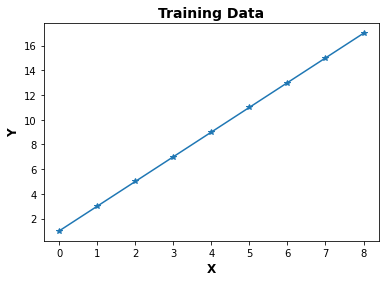

In [32]:
# data for regression
[x,y] = datagen()
plt.plot(x,y,'-*')
plt.title('Training Data', fontsize=14, fontweight='bold')
plt.ylabel('Y', fontsize=12, fontweight='bold')
plt.xlabel('X', fontsize=12, fontweight='bold')
plt.show()

In [0]:
# Sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([Dense(units=1, input_shape=[1])])

In [36]:
# compile the model
model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['mse','mae'])
# train the model
model.fit(x,y,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 142.6765 - mse: 142.6765 - mae: 10.0479
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 40.4689 - mse: 40.4689 - mae: 5.3328
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 11.5012 - mse: 11.5012 - mae: 2.8277
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 3.2909 - mse: 3.2909 - mae: 1.4941
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.9636 - mse: 0.9636 - mae: 0.8031
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3036 - mse: 0.3036 - mae: 0.4528
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1162 - mse: 0.1162 - mae: 0.2873
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0628 - mse: 0.0628 - mae: 0.2170
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473 - mae: 0.1884
Epoch 10/500
1/1 [===================

In [42]:
x_pred = 10 # Predict y value for a given x
Predicted = model.predict([x_pred])[0]
Actual = 2*x_pred+1
print("Actual Value:",Actual, '  Predicted Value:', Predicted[0])

Actual Value: 21   Predicted Value: 20.982296


In [43]:
model.weights
# Actual relation is w*x+b (where w is 2 and b is 1)
# predicted values for w is 1.9959806 and b is 1.0224895 (These numbers might vary for you)

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9959806]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([1.0224895], dtype=float32)>]